# Fed Batch Bioreactor

This model represents the fed batch bioreactor in section 2.4.9 of Seborg et al.

![Table Batch Bioreactor](./img/tableOfBioreactor.png)

## Model equations:

In [2]:
# Parameters
mu_max = 0.2 # Maximum growth rate
K_s = 1.0 # Monod Constant
Y_xs = 0.5 # Cell yield coefficient
Y_px = 0.2 # Product yield coefficient

In [3]:
# States
X = 0.05 # Concentration of the cells
S = 10 # Concentration of the substrate
P = 0 # Concentration of the product
V = 1

x0 = [X, S, P, V] # State Vector 

In [4]:
F = 0.05 # Feed rate
S_f = 10 # Concentration of substrate in feed

In [5]:
def dxdt(t, x):
    [X, S, P, V] = x
    
    mu = mu_max * S / (K_s + S)
    rg  = mu * X
    rp = Y_px * rg
    dVdt = F
    dXdt = 1/V*(V * rg - dVdt *X)
    dPdt = 1/V*(V * rp - dVdt * P)
    dSdt = 1/V*(F * S_f - 1 / Y_xs * rg - dVdt * S)
    
    return [dXdt, dSdt, dPdt, dVdt]

In [6]:
import scipy.integrate
import numpy

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
tspan = [0, 30]

In [9]:
tsmooth = numpy.linspace(0, 30)

In [10]:
Fs = [0.05, 0.02]

In [11]:
results = []

In [12]:
for F in Fs:
    out = scipy.integrate.solve_ivp(dxdt, tspan, x0, t_eval=tsmooth)
    results.append(out)

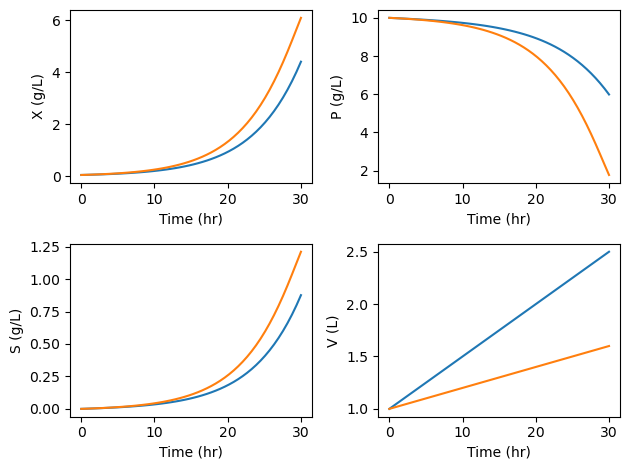

In [21]:
# Define the names of your variables
names = ['X', 'P', 'S', 'V']
units = {'X': 'g/L', 'P': 'g/L', 'S': 'g/L', 'V': 'L'}
ax = {}

fig, [[ax['X'], ax['P']], [ax['S'], ax['V']]] = plt.subplots(2, 2)

for F, out in zip(Fs, results):
    var = {name: y for name, y in zip(names, out.y)}
    for name in names:
        ax[name].plot(out.t, var[name])
        ax[name].set_ylabel(f'{name} ({units[name]})')
        ax[name].set_xlabel('Time (hr)')
plt.tight_layout()